## analysis and visualization of data

In [104]:
# !pip install seaborn

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# train_df = train_df.drop(['id', 'timecc'], axis=1)
# test_df = test_df.drop(['id', 'timecc'], axis=1)

Populating the interactive namespace from numpy and matplotlib


In [106]:
train_df.isnull().mean(0)

id                        0.0
win                       0.0
kills                     0.0
deaths                    0.0
assists                   0.0
largestkillingspree       0.0
largestmultikill          0.0
longesttimespentliving    0.0
doublekills               0.0
triplekills               0.0
quadrakills               0.0
pentakills                0.0
totdmgdealt               0.0
magicdmgdealt             0.0
physicaldmgdealt          0.0
truedmgdealt              0.0
largestcrit               0.0
totdmgtochamp             0.0
magicdmgtochamp           0.0
physdmgtochamp            0.0
truedmgtochamp            0.0
totheal                   0.0
totunitshealed            0.0
dmgtoturrets              0.0
timecc                    0.0
totdmgtaken               0.0
magicdmgtaken             0.0
physdmgtaken              0.0
truedmgtaken              0.0
wardsplaced               0.0
wardskilled               0.0
firstblood                0.0
dtype: float64

<AxesSubplot:>

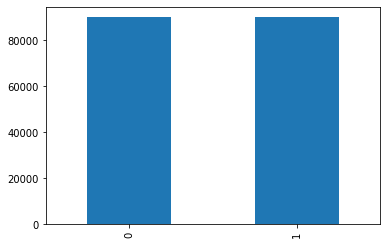

In [107]:
train_df['win'].value_counts().plot(kind='bar')

/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kills', ylabel='Density'>

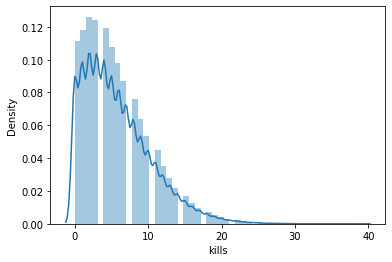

In [108]:
sns.distplot(train_df['kills'])

/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deaths', ylabel='Density'>

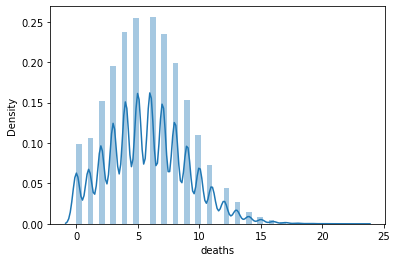

In [109]:
sns.distplot(train_df['deaths'])

<AxesSubplot:xlabel='win', ylabel='kills'>

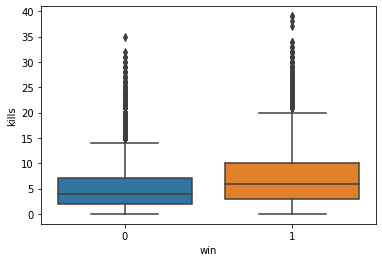

In [110]:
sns.boxplot(y='kills', x='win', data=train_df)

Text(0, 0.5, 'deaths')

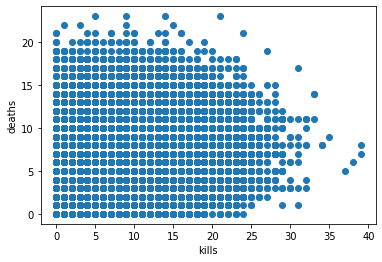

In [111]:
plt.scatter(train_df['kills'], train_df['deaths'])
plt.xlabel('kills')
plt.ylabel('deaths')

In [112]:
# for col in train_df.columns[1:]:
#     train_df[col] /= train_df[col].max()
#     test_df[col] /= test_df[col].max()

In [113]:
train_df

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,0,1,5,2,0,1,569,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,0,5,8,7,3,1,880,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,1,6,16,0,1,593,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,0,1,2,0,0,1,381,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,0,4,11,25,0,1,455,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,1,1,6,12,0,1,362,0,0,...,3,5751,0,14786,2374,12309,102,12,1,0
179996,179996,1,7,3,4,5,1,574,0,0,...,2,8907,0,11019,3933,6533,552,7,2,0
179997,179997,1,9,0,9,9,1,0,0,0,...,4,6627,0,14279,3661,10617,0,7,2,1
179998,179998,1,14,1,5,10,2,980,3,0,...,1,1943,0,19165,4818,14110,236,6,0,0


In [114]:
# def computeKDA(df):
#     if df['deaths'] is 0:
#         return (df['kills'] + df['assists']).astype('float')
#     else:
#         return ((df['kills'] + df['assists']) / df['deaths']).astype('float')

# train_df.loc[:, 'kda'] = train_df.apply(computeKDA, axis=1)
# train_df

## auto!

### training

In [115]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset('train.csv')
train_data

Loaded data from: train.csv | Columns = 32 / 32 | Rows = 180000 -> 180000


,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,0,1,5,2,0,1,569,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,0,5,8,7,3,1,880,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,1,6,16,0,1,593,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,0,1,2,0,0,1,381,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,0,4,11,25,0,1,455,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,1,1,6,12,0,1,362,0,0,...,3,5751,0,14786,2374,12309,102,12,1,0
179996,179996,1,7,3,4,5,1,574,0,0,...,2,8907,0,11019,3933,6533,552,7,2,0
179997,179997,1,9,0,9,9,1,0,0,0,...,4,6627,0,14279,3661,10617,0,7,2,1
179998,179998,1,14,1,5,10,2,980,3,0,...,1,1943,0,19165,4818,14110,236,6,0,0


In [116]:
type(train_data['deaths'])

pandas.core.series.Series

In [117]:
# for col in train_data.columns[1:]:
#     train_data[col] /= train_data[col].max()
def generateVirtualDeaths(df):
    if df['deaths'] <= 0:
        return 1
    else:
        return df['deaths']

def computeKDA(df):
    return ((df['kills'] + df['assists']) / df['virtual_deaths']).astype('float')

train_data.loc[:, 'virtual_deaths'] = train_data.apply(generateVirtualDeaths, axis=1)
train_data.loc[:, 'kda'] = train_data.apply(computeKDA, axis=1)
train_data

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood,virtual_deaths,kda
0,0,0,1,5,2,0,1,569,0,0,...,0,7819,2178,5239,401,4,1,0,5,0.600000
1,1,0,5,8,7,3,1,880,0,0,...,0,24637,5607,17635,1394,10,0,0,8,1.500000
2,2,1,1,6,16,0,1,593,0,0,...,0,18749,3651,14834,263,7,1,0,6,2.833333
3,3,0,1,2,0,0,1,381,0,0,...,0,12134,1739,10318,76,8,1,0,2,0.500000
4,4,0,4,11,25,0,1,455,0,0,...,0,27891,14068,12749,1073,34,2,0,11,2.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,1,1,6,12,0,1,362,0,0,...,0,14786,2374,12309,102,12,1,0,6,2.166667
179996,179996,1,7,3,4,5,1,574,0,0,...,0,11019,3933,6533,552,7,2,0,3,3.666667
179997,179997,1,9,0,9,9,1,0,0,0,...,0,14279,3661,10617,0,7,2,1,1,18.000000
179998,179998,1,14,1,5,10,2,980,3,0,...,0,19165,4818,14110,236,6,0,0,1,19.000000


In [118]:
id, label = 'id', 'win'
predictor = TabularPredictor(label=label).fit(
    train_data.drop(columns=[id, 'virtual_deaths']),
    # num_bag_folds=5,
    # num_bag_sets=1,
    # num_stack_levels=1,
    auto_stack=True,
    presets='best_quality',
    # ag_args_fit={'num_gpus': 2}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220504_072909/"
Presets specified: ['best_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220504_072909/"
AutoGluon Version:  0.3.1
Train Data Rows:    180000
Train Data Columns: 31
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


[1000]	train_set's binary_error: 0.129698	valid_set's binary_error: 0.139111


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument in

[1000]	train_set's binary_error: 0.128802	valid_set's binary_error: 0.143


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.8542	 = Validation score   (accuracy)
	39.61s	 = Training   runtime
	0.87s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' a

In [119]:
predictor.leaderboard()

                      model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.858478      47.002013  3894.920473                0.214982          43.851919            3       True         24
1    NeuralNetFastAI_BAG_L2   0.858300      46.097841  3833.727109                2.047774        2308.143263            2       True         21
2            XGBoost_BAG_L2   0.857539      44.570610  1535.652164                0.520542          10.068318            2       True         22
3           LightGBM_BAG_L2   0.857294      44.220422  1534.267581                0.170354           8.683735            2       True         15
4       WeightedEnsemble_L2   0.856911      23.433141  1529.756578                0.214121          53.706442            2       True         13
5           CatBoost_BAG_L2   0.856861      44.133288  1529.838336                0.083220           4.254490            2       T

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.858478,47.002013,3894.920473,0.214982,43.851919,3,True,24
1,NeuralNetFastAI_BAG_L2,0.858300,46.097841,3833.727109,2.047774,2308.143263,2,True,21
2,XGBoost_BAG_L2,0.857539,44.570610,1535.652164,0.520542,10.068318,2,True,22
3,LightGBM_BAG_L2,0.857294,44.220422,1534.267581,0.170354,8.683735,2,True,15
4,WeightedEnsemble_L2,0.856911,23.433141,1529.756578,0.214121,53.706442,2,True,13
5,CatBoost_BAG_L2,0.856861,44.133288,1529.838336,0.083220,4.254490,2,True,18
6,LightGBMLarge_BAG_L2,0.856772,44.203860,1534.561417,0.153792,8.977571,2,True,23
7,LightGBMXT_BAG_L2,0.856683,44.218715,1532.856974,0.168647,7.273128,2,True,14
8,RandomForestEntr_BAG_L2,0.855678,50.608790,1564.562729,6.558722,38.978883,2,True,17
9,ExtraTreesGini_BAG_L2,0.855644,51.250450,1534.308981,7.200383,8.725135,2,True,19


In [120]:
predictor.feature_importance(train_data)

Computing feature importance via permutation shuffling for 33 features using 1000 rows with 3 shuffle sets...
	919.7s	= Expected runtime (306.57s per shuffle set)
	123.85s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
dmgtoturrets,0.122000,0.006557,0.000481,3,0.159575,0.084425
kda,0.074000,0.009644,0.002807,3,0.129259,0.018741
assists,0.050333,0.016653,0.017303,3,0.145759,-0.045092
physicaldmgdealt,0.035667,0.008737,0.009710,3,0.085730,-0.014397
longesttimespentliving,0.034667,0.000577,0.000046,3,0.037975,0.031358
totdmgdealt,0.028333,0.003786,0.002949,3,0.050027,0.006639
totheal,0.027667,0.001155,0.000290,3,0.034283,0.021050
totdmgtaken,0.024000,0.005196,0.007634,3,0.053775,-0.005775
magicdmgtaken,0.022000,0.006557,0.014180,3,0.059575,-0.015575
totdmgtochamp,0.021000,0.002646,0.002625,3,0.036160,0.005840


### prediction

In [121]:
import pandas as pd

test_data = TabularDataset('test.csv')

def generateVirtualDeaths(df):
    if df['deaths'] <= 0:
        return 1
    else:
        return df['deaths']

def computeKDA(df):
    return ((df['kills'] + df['assists']) / df['virtual_deaths']).astype('float')

test_data.loc[:, 'virtual_deaths'] = test_data.apply(generateVirtualDeaths, axis=1)
test_data.loc[:, 'kda'] = test_data.apply(computeKDA, axis=1)
test_data

Loaded data from: test.csv | Columns = 31 / 31 | Rows = 20000 -> 20000


,id,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood,virtual_deaths,kda
0,180000,8,7,5,2,1,874,0,0,0,...,0,20112,6704,12945,462,10,3,0,7,1.857143
1,180001,4,8,5,2,1,978,0,0,0,...,0,49389,19109,29651,629,15,2,0,8,1.125000
2,180002,19,6,8,10,2,912,5,0,0,...,0,26606,8344,17627,634,14,2,0,6,4.500000
3,180003,1,8,6,0,1,519,0,0,0,...,0,25852,5111,19552,1189,5,3,0,8,0.875000
4,180004,1,10,12,0,1,646,0,0,0,...,0,34486,16690,16882,914,39,9,0,10,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,199995,2,9,28,0,1,886,0,0,0,...,0,34860,14476,19691,692,22,1,0,9,3.333333
19996,199996,1,2,2,0,1,383,0,0,0,...,0,15828,1375,14404,48,8,0,0,2,1.500000
19997,199997,2,9,4,0,1,387,0,0,0,...,0,22255,4189,16467,1598,0,0,1,9,0.666667
19998,199998,0,5,0,0,0,381,0,0,0,...,0,11519,4679,6839,0,4,0,0,5,0.000000


In [122]:
# for col in test_data.columns[1:]:
#     test_data[col] /= test_data[col].max()

preds = predictor.predict(test_data.drop(columns=[id, 'virtual_deaths']))
submission = pd.DataFrame({label:preds}).to_csv('submission.csv', index=None)

In [123]:
!zip submission.zip submission.csv

  adding: submission.csv (deflated 90%)
